In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Mental_Health_Clean.csv")
df = df.drop(['Have you ever sought treatment for a mental health issue from a mental health professional?','Have you had a mental health disorder in the past?','Do you currently have a mental health disorder?','If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?','If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'],axis=1)
df.to_csv("Mental_Health_Clean_droppedObvColumns_NOTFEATURESELECTED.csv")

In [3]:
df.shape

(1015, 38)

In [4]:
df.columns

Index(['How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Do you t

In [10]:
# Chi-squared  (categorical response, categorical predictors)
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result=''
#             result="{0} is IMPORTANT for Prediction".format(colX)
            
        else:
#             result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
#             result="{0} is NOT an important predictor".format(colX)
            result=colX
            print(result)
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)
cT = ChiSquare(df)
#Feature Selection

testColumns = df.columns.tolist()
for var in testColumns:
    cT.TestIndependence(colX=var,colY='Have you been diagnosed with a mental health condition by a medical professional?' )  

How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
Would you feel comfortable discussing a mental health disorder with your coworkers?
Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
Do you think that discussing a physical health issue with previous employers would have negative consequences?
Would you have been willing to discuss a mental health issue with your previous co-workers?
Would you be willing to bring up a physical health issue with a potential employer in an interview?
Do you think that

In [40]:
col_to_drop = ["How many employees does your company or organization have?"
,"Is your employer primarily a tech company/organization?"
,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
,"Does your employer offer resources to learn more about mental health concerns and options for seeking help?"
,"Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
,"Would you feel comfortable discussing a mental health disorder with your coworkers?"
,"Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"
,"Do you think that discussing a physical health issue with previous employers would have negative consequences?"
,"Would you have been willing to discuss a mental health issue with your previous co-workers?"
,"Would you be willing to bring up a physical health issue with a potential employer in an interview?"
,"Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"
,"What is your age?"]
# pd.DataFrame({"Unimportant Variables":col_to_drop}).to_csv("Dropped_Columns.csv")
df = df.drop(col_to_drop,axis=1)
df.to_csv("Mental_Health_Clean_droppedObvColumnsANDfeatureselected.csv")
df.shape


In [14]:
fs_df.columns
fs_df.shape

(1015, 25)

(1015, 26)

In [3]:
df = pd.read_csv("Mental_Health_Clean_droppedObvColumnsANDfeatureselected.csv").drop(["Unnamed: 0"],axis=1)
df.shape

(1015, 25)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

#SearchCV
# from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import learning_curve,GridSearchCV,RandomizedSearchCV

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#Neural Network
from sklearn.neural_network import MLPClassifier


In [5]:
# Split Train Test
target=df['Have you been diagnosed with a mental health condition by a medical professional?']
y = target
X = df.drop(['Have you been diagnosed with a mental health condition by a medical professional?'],axis=1)
feature_cols = X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.3, random_state=0)
# Import and Prepare Grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



# Search for best Param
rf = RandomForestClassifier(n_estimators = 20)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
str(rf_random.best_params_).replace(":","=").replace("'","").replace("{","").replace("}","").replace("'","")

# Get Accuracy
rf = RandomForestClassifier(n_estimators= rf_random.best_params_['n_estimators'], min_samples_split= rf_random.best_params_['min_samples_split'], min_samples_leaf= rf_random.best_params_['min_samples_leaf'], max_features= rf_random.best_params_['max_features'], max_depth= rf_random.best_params_['max_depth'], bootstrap= rf_random.best_params_['bootstrap'])
rf.fit(X_train, y_train)
print(rf.score(X_test,y_test))

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


0.7147540983606557


In [37]:
str(rf_random.best_params_).replace(":","=").replace("'","").replace("{","").replace("}","").replace("'","")

'n_estimators= 800, min_samples_split= 10, min_samples_leaf= 4, max_features= sqrt, max_depth= 50, bootstrap= True'

In [6]:
evalClassModel(rf, X, y, X_test, y_test, rf.predict(X_test), plot=True)

NameError: name 'evalClassModel' is not defined

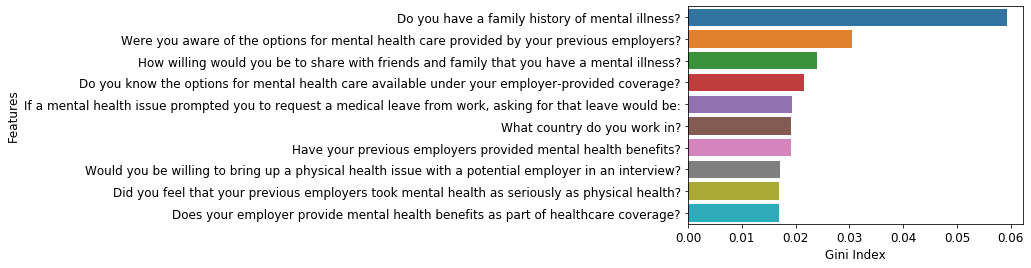

In [75]:
# Tree classifier Important Variables
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
y = df['Have you ever sought treatment for a mental health issue from a mental health professional?']
X = df.drop(['Have you ever sought treatment for a mental health issue from a mental health professional?'],axis=1)
feature_cols=X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_
feature_importance = pd.DataFrame({"Features":X.columns.tolist(),"Gini Index":clf.feature_importances_})
feature_importance.sort_values("Gini Index",ascending=False,inplace=True)
# Top Ten Variable
sns.barplot(x="Gini Index",y="Features",data=feature_importance.iloc[1:11])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.6min finished


0.8655737704918033


'n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 2, max_features= sqrt, max_depth= 20, bootstrap= True'

Accuracy: 0.8721311475409836
Null accuracy:
 1    175
0    130
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.5737704918032787
Percentage of zeros: 0.42622950819672134
True: [1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0]
Pred: [0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0]


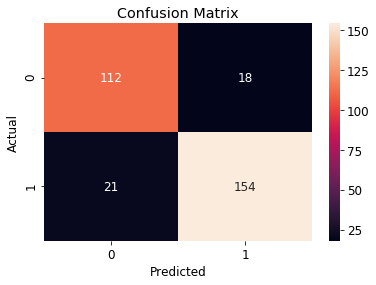

Classification Accuracy: 0.8721311475409836
Classification Error: 0.12786885245901636
False Positive Rate: 0.13846153846153847
Precision: 0.8953488372093024
AUC Score: 0.8707692307692309
Cross-validated AUC: 0.9177984310714777
First 10 predicted responses:
 [0 0 1 0 1 1 1 1 0 0]
First 10 predicted probabilities of class members:
 [[0.68747143 0.31252857]
 [0.76977329 0.23022671]
 [0.12429722 0.87570278]
 [0.69040707 0.30959293]
 [0.07000079 0.92999921]
 [0.0592504  0.9407496 ]
 [0.04790833 0.95209167]
 [0.0282131  0.9717869 ]
 [0.78839971 0.21160029]
 [0.78257278 0.21742722]]
First 10 predicted probabilities:
 [[0.31252857]
 [0.23022671]
 [0.87570278]
 [0.30959293]
 [0.92999921]
 [0.9407496 ]
 [0.95209167]
 [0.9717869 ]
 [0.21160029]
 [0.21742722]]


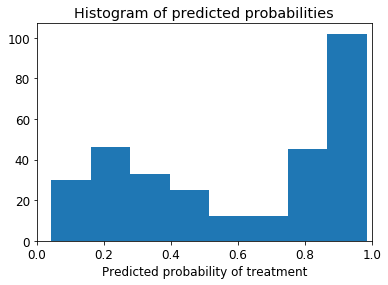

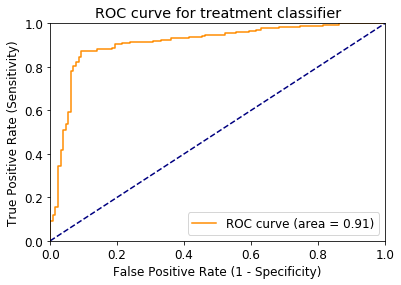

[[112  18]
 [ 21 154]]


NameError: name 'accuracy' is not defined

,How willing would you be to share with friends and family that you have a mental illness?,Do you have a family history of mental illness?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",Have you been diagnosed with a mental health condition by a medical professional?,"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Have you had a mental health disorder in the past?
0,1,0,0,4,1,4,1
1,1,1,1,0,1,3,1
2,1,0,1,4,0,4,2
3,1,1,1,3,1,3,1
4,1,0,1,4,0,1,0
5,4,0,0,4,0,4,0
6,1,1,1,3,1,1,1
7,1,1,1,0,1,1,1
8,2,2,1,3,1,1,1
9,-2,1,1,0,1,0,1


In [18]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new
# lst = []
# for i in X.columns:
#     unique = X[i].unique()
#     for j in unique:
#         if j<0:
#             lst+=[i]
#             break
# lst

array([[1., 0., 1., ..., 0., 4., 4.],
       [1., 1., 1., ..., 1., 0., 3.],
       [1., 0., 2., ..., 1., 4., 4.],
       ...,
       [2., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 0., 3.],
       [1., 1., 2., ..., 0., 3., 1.]])

In [ ]:
evalClassModel(rf,y_test,)

In [25]:
def evalClassModel(model, X, y, X_test, y_test, y_pred_class, plot=True):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print('Classification Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    return accuracy

In [ ]:
# Impt Variable
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# y=df['Have you ever sought treatment for a mental health issue from a mental health professional?']
# X = df.drop(['Have you ever sought treatment for a mental health issue from a mental health professional?'],axis=1)
# feature_cols=X.columns.tolist()
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
# clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X, y)
# clf.feature_importances_
# Feature selection using RF
# sorted(range(len(clf.feature_importances_)), key=lambda i: clf.feature_importances_[i])[-7:]
# X_new = X.iloc[:,[15, 31, 33, 36, 32, 35, 34]]
# X_new.head()
# df = pd.concat([X_new,y],axis=1)
# df.to_csv("Feature_Selected_mental_health.csv")

# Willingness to discuss MH with curr direct supervisor

In [103]:
df = pd.read_csv("Mental_Health_Clean.csv")
# Drop obvious variables
to_drop = ["Would you feel comfortable discussing a mental health disorder with your coworkers?",
           'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
           'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
           'Would you bring up a mental health issue with a potential employer in an interview?']
df.drop(to_drop,axis=1,inplace=True)
df = df[df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"]!=2]
df.shape

# Response Variable
# "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"


(679, 38)

In [97]:
df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"].unique()

array([1, 0], dtype=int64)

# Train Test Split and Chi-Squared Test

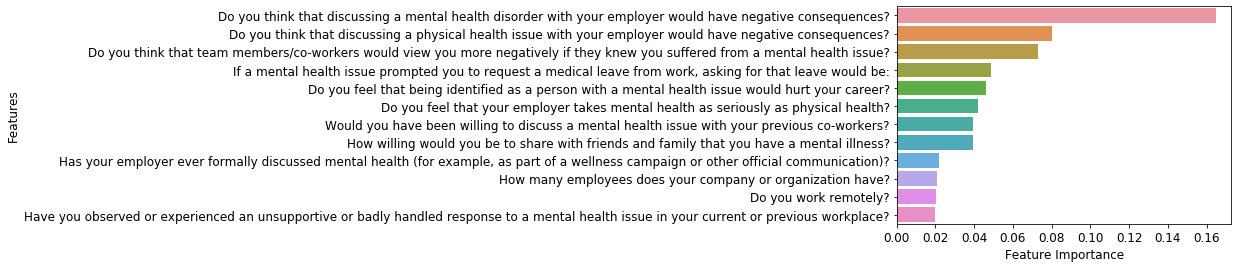

In [104]:
# Train Test Split
y = df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"]
X = df.drop(["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"],axis=1)
feature_cols=X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_
feature_importance = pd.DataFrame({"Features":X.columns.tolist(),"Feature Importance":clf.feature_importances_})
feature_importance.sort_values("Feature Importance",ascending=False,inplace=True)
# Top Ten Variable
sns.barplot(x="Feature Importance",y="Features",data=feature_importance.iloc[0:12])

In [113]:
#Feature Selection
# Chi Square Test
cT = ChiSquare(df)
testColumns = pd.concat([X_train,y_train],axis=1).columns.tolist()
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?")  
    
#  Drop Unimport Variables
col_to_drop = [
"How many employees does your company or organization have?",
"Is your employer primarily a tech company/organization?",
"Have your previous employers provided mental health benefits?",
"Were you aware of the options for mental health care provided by your previous employers?",
"Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
"Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
"Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?",
"Do you have a family history of mental illness?",
"Have you had a mental health disorder in the past?",
"Do you currently have a mental health disorder?",
"Have you been diagnosed with a mental health condition by a medical professional?",
"Have you ever sought treatment for a mental health issue from a mental health professional?",
"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",
"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",
"What is your age?",
"What is your gender?",
"What country do you work in?"]

fs_df = df.drop(col_to_drop,axis=1)
fs_df.to_csv("newresponse_Mental_Health_Clean_droppedObvColumnsANDfeatureselected.csv")
print(fs_df.shape)

pd.DataFrame({"Unimportant Variables":col_to_drop}).to_csv("newresponse_Dropped_Columns.csv")

How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Have your previous employers provided mental health benefits?
Were you aware of the options for mental health care provided by your previous employers?
Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
Did your previous employers provide resources to learn more about mental health issues and how to seek help?
Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
Do you have a family history of mental illness?
Have you had a mental health disorder in the past?
Do you currently have a mental health disorder?
Have you been diagnosed with a mental health condition by a medical professional?
Have you ever sought treatment for a mental health issue from a mental health professional?
If you have a mental health issue, do you feel that it

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished


0.8137254901960784
Accuracy: 0.8137254901960784
Null accuracy:
 1    124
0     80
Name: Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?, dtype: int64
Percentage of ones: 0.6078431372549019
Percentage of zeros: 0.3921568627450981
True: [1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1]
Pred: [0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1]


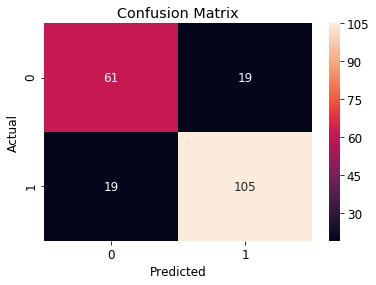

Classification Accuracy: 0.8137254901960784
Classification Error: 0.18627450980392157
False Positive Rate: 0.2375
Precision: 0.8467741935483871
AUC Score: 0.8046370967741935
Cross-validated AUC: 0.9042809776430467
First 10 predicted responses:
 [0 0 0 1 1 1 1 1 0 1]
First 10 predicted probabilities of class members:
 [[0.68443302 0.31556698]
 [0.66166144 0.33833856]
 [0.70324946 0.29675054]
 [0.42950463 0.57049537]
 [0.11437831 0.88562169]
 [0.01263294 0.98736706]
 [0.17674086 0.82325914]
 [0.06005622 0.93994378]
 [0.59741402 0.40258598]
 [0.20592316 0.79407684]]
First 10 predicted probabilities:
 [[0.31556698]
 [0.33833856]
 [0.29675054]
 [0.57049537]
 [0.88562169]
 [0.98736706]
 [0.82325914]
 [0.93994378]
 [0.40258598]
 [0.79407684]]


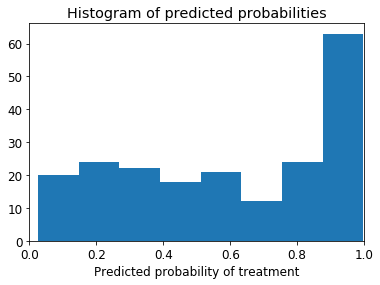

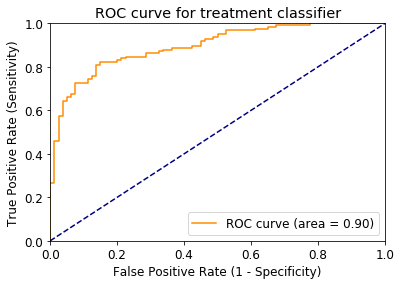

[[ 61  19]
 [ 19 105]]


NameError: name 'accuracy' is not defined

In [115]:
# Train test split
fstarget=fs_df["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"]
fsy = fstarget
fsX = fs_df.drop(["Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"],axis=1)
fsfeature_cols = fsX.columns.tolist()
fsX_train, fsX_test, fsy_train, fsy_test = train_test_split(fsX,fstarget, test_size=0.3, random_state=0)

# Getting Best Para
fsrf = RandomForestClassifier(n_estimators = 20)
fsrf_random = RandomizedSearchCV(estimator = fsrf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
fsrf_random.fit(fsX, fsy)
str(fsrf_random.best_params_).replace(":","=").replace("'","").replace("{","").replace("}","").replace("'","")


# Fitting with best parameter
fsrf = RandomForestClassifier(n_estimators= fsrf_random.best_params_['n_estimators'], min_samples_split= fsrf_random.best_params_['min_samples_split'], min_samples_leaf= fsrf_random.best_params_['min_samples_leaf'], max_features= fsrf_random.best_params_['max_features'], max_depth= fsrf_random.best_params_['max_depth'], bootstrap= fsrf_random.best_params_['bootstrap'])
fsrf.fit(fsX_train, fsy_train)
print(fsrf.score(fsX_test,fsy_test))
str(fsrf_random.best_params_).replace(":","=").replace("'","").replace("{","").replace("}","").replace("'","")
evalClassModel(fsrf, fsX, fsy, fsX_test, fsy_test, fsrf.predict(fsX_test), plot=True)

In [116]:
fsX.shape

(679, 20)